# UCI Wine Quality Dataset

This Notebook Works on the UCI Wine Quality Dataset. This dataset is available on Kaggle.

In [1]:
import sys  
sys.path.insert(0, '/Users/dhanendrasoni/PycharmProjects/feature_selection')

import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from utils.helper_utils import prepare_wine_quality_data, plot_mean_error_vs_num_features, plot_time_error_bar_graph
from src.optimum_feature_select import optimal_features
from src.wine_quality_dataset.wine_quality_prediction import wine_quality_prediction


In [4]:
# prepate the Wine Quality dataset
data = np.genfromtxt('../data/uci-wine-quality-dataset/winequality-data.csv', delimiter=',', skip_header=1)

X = data[:, :11]
y = data[:, 11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)


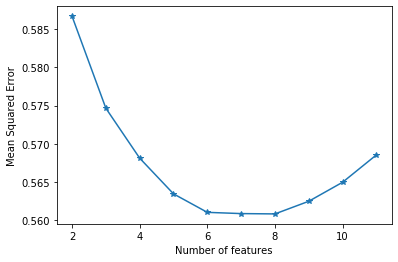

In [5]:
# forward feature selection
num_feature_list, error_list = optimal_features(X_train, X_test, y_train, y_test, feature_selection_method='forward')
plot_mean_error_vs_num_features(num_feature_list, error_list)


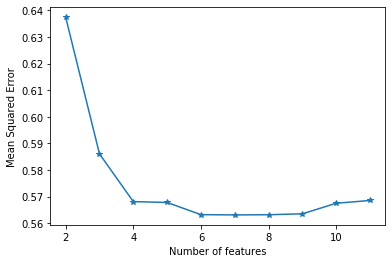

In [6]:
# backward feature selection
num_feature_list, error_list = optimal_features(X_train, X_test, y_train, y_test, feature_selection_method='backward')
plot_mean_error_vs_num_features(num_feature_list, error_list)


## Optimal number of features

Observe the plot and find the number of features where mean square error stops chaning.

Compare the optimal number of features with total number of featurs in terms of mean squeare error and time taken to train the model.

#### Forward Feature Selection

0.4429817199707031
0.5249977111816406


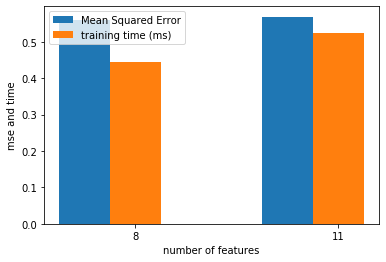

In [7]:
# calcualte the MSE and time diffs for selected features and total features
mse1, time_diff1 = wine_quality_prediction(selection_method='forward', num_features=8)
mse2, time_diff2 = wine_quality_prediction(selection_method='forward', num_features=11)

mean_square_errors = [mse1, mse2]
time_deltas = [time_diff1, time_diff2]
    
plot_time_error_bar_graph(mean_square_errors, time_deltas, 8, 11)

#### Backward Feature Selection

0.6279945373535156
0.8959770202636719


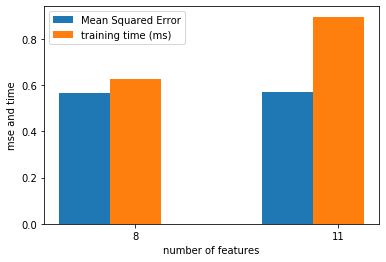

In [11]:
# calcualte the MSE and time diffs for selected features and total features
mse1, time_diff1 = wine_quality_prediction(selection_method='backward', num_features=8)
mse2, time_diff2 = wine_quality_prediction(selection_method='backward', num_features=11)

mean_square_errors = [mse1, mse2]
time_deltas = [time_diff1, time_diff2]
    
plot_time_error_bar_graph(mean_square_errors, time_deltas, 8, 11)

we can see that the training time get reduced with less number of features while mean square error remains similar to using all the features.